In [1]:
import os, requests
import numpy as np

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [2]:
alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [3]:
# testing
dat = alldat[0]
#print(dat['brain_area'])
print(dat['brain_area'].shape)
print(dat['spks'].shape)
#print(dat['spks'])
#print(alldat[1]['date_exp'])
print(dat['response'].shape)
print(dat['response'])

(734,)
(734, 214, 250)
(214,)
[ 1. -1.  1.  0.  1.  1. -1. -1.  0.  1.  1.  0.  1.  1.  1. -1.  0. -1.
 -1. -1.  0.  1.  1.  0.  1.  1.  0. -1.  1. -1. -1.  0. -1.  1. -1.  0.
  0. -1. -1.  1.  1. -1. -1. -1.  0. -1. -1.  1. -1.  1. -1. -1.  0.  1.
  1. -1. -1. -1. -1. -1. -1. -1.  0. -1.  1. -1. -1.  0. -1.  0.  1. -1.
  1. -1. -1.  1. -1. -1. -1.  0.  0.  1. -1. -1.  1.  0.  0.  1. -1.  1.
  1.  1.  1.  0. -1.  1. -1.  0.  1.  0. -1.  1. -1.  0. -1.  0. -1.  0.
 -1.  0.  0.  0.  0.  0. -1.  0.  1.  1.  0.  1.  0.  1. -1.  1. -1.  1.
 -1. -1.  1.  0. -1.  0. -1. -1. -1.  0.  0.  1.  0. -1.  1. -1. -1.  1.
 -1.  0.  0.  1.  0.  1.  1.  0.  1. -1.  0. -1.  1. -1.  0.  0.  0.  1.
  1.  0. -1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0. -1.  1.  1.  1.  0.
  0.  1.  0.  0.  0. -1.  0. -1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.]


In [4]:
#how many neurons from particular brain region
m_allba=np.array([], dtype=np.bool)
for j in range(38):
    dat = alldat[j]
    ba = dat['brain_area']
    m=np.zeros(len(ba), dtype=np.bool)
    for i in range(len(dat['brain_area'])):
            if ba[i] == 'VISp':
                m[i]=True
            else:
                m[i]=False
    m_allba=np.append(m_allba, [m])            
#print(m_allba)
#print(np.sum(m_allba))    



In [5]:
#first attempt
spks=dat['spks']
visp = []

for i in range(len(dat['brain_area'])):
    if ba[i] == 'VISp':
        if (len(visp) > 0):
            visp = np.append(visp, [spks[i]], axis=0)
        else:
            visp = np.array([spks[i]])
 
#print(visp)              

In [6]:

def filter1(i, BR):
    #mask for the brain region
    dat = alldat[i]
    ba = dat['brain_area']
    m_brainregion=np.zeros(len(ba), dtype=np.bool)
    for i in range(len(dat['brain_area'])):
        if ba[i] == BR:
            m_brainregion[i]=True
        else:
            m_brainregion[i]=False
               
    #mask for contrast
    dat['contrast_right']
    dat['contrast_left']
    c01=np.logical_and(dat['contrast_right']==0, dat['contrast_left']==1)
    c10=np.logical_and(dat['contrast_right']==1, dat['contrast_left']==0)
    m_contrast=np.logical_or(c01, c10)
    #masks
    spks=dat['spks']
    a=spks[m_brainregion]
    b = a[:, m_contrast]
    return b

In [7]:
a=filter1(3, 'LGd')
print (a.shape)


(140, 27, 250)


In [8]:
def response_filter(i, response):
    dat = alldat[i]
    res = dat['response']
    m_response=np.zeros(len(dat['response']), dtype=np.bool)
    for i in range(len(dat['response'])):
        if res[i] == response:
            m_response[i]=True
        else:
            m_response[i]=False
    return m_response


In [9]:
def contrast_filter(i):
    c01=np.logical_and(dat['contrast_right']==0, dat['contrast_left']==1)
    c10=np.logical_and(dat['contrast_right']==1, dat['contrast_left']==0)
    m_contrast=np.logical_or(c01, c10)
    return m_contrast

In [10]:
def brainarea_filter(i, BR):
    #mask for the brain region
    dat = alldat[i]
    ba = dat['brain_area']
    m_brainregion=np.zeros(len(ba), dtype=np.bool)
    for i in range(len(dat['brain_area'])):
        if ba[i] == BR:
            m_brainregion[i]=True
        else:
            m_brainregion[i]=False
    return m_brainregion

In [11]:
#checking percentage of correct answers
v = []
for i in range(39):
  mask = np.logical_or(np.logical_and(alldat[i]['contrast_right']==1,alldat[i]['contrast_left']==0),
                       np.logical_and(alldat[i]['contrast_right']==0,alldat[i]['contrast_left']==1))
  v.append((alldat[i]['feedback_type'][mask]+1)/2)
v = np.concatenate(v)
print(f"{np.mean(v)*100:0.2f}%")


74.96%


In [12]:
#applying all the masks, swaping the axis, constructing X(trials)
def apply_filters(i, BR):
    dat = alldat[i]
    spks=dat['spks']
    mba=brainarea_filter(i, BR)
    mc=contrast_filter(i)
    mrcorr=response_filter(i, 1)
    mrincorr=response_filter(i, -1)
    mr=np.logical_or(mrcorr, mrincorr)
    a=spks[mba]
    x=a[:, np.logical_and(mc, mr)]
    x=np.swapaxes(x ,1, 0)
    #constructing Y(trial responses)
    y=dat['response']
    y=y[np.logical_and(mc, mr)]
    return x, y

In [13]:
def response_filter(i, response):
    dat = alldat[i]
    res = dat['response']
    m_response=np.zeros(len(dat['response']), dtype=np.bool)
    for i in range(len(dat['response'])):
        if res[i] == response:
            m_response[i]=True
        else:
            m_response[i]=False
    return m_response

def contrast_filter(i):
    dat = alldat[i]
    c01=np.logical_and(dat['contrast_right']==0, dat['contrast_left']==1)
    c10=np.logical_and(dat['contrast_right']==1, dat['contrast_left']==0)
    m_contrast=np.logical_or(c01, c10)
    return m_contrast

def brainarea_filter(i, BR):
    #mask for the brain region
    dat = alldat[i]
    ba = dat['brain_area']
    m_brainregion=np.zeros(len(ba), dtype=np.bool)
    for i in range(len(dat['brain_area'])):
        if ba[i] == BR:
            m_brainregion[i]=True
        else:
            m_brainregion[i]=False
    return m_brainregion

#applying all the masks, swaping the axis, constructing X(trials)
def apply_filters(i, BR):
    dat = alldat[i]
    spks=dat['spks']
    mba=brainarea_filter(i, BR)
    mc=contrast_filter(i)
    mrcorr=response_filter(i, 1)
    mrincorr=response_filter(i, -1)
    mr=np.logical_or(mrcorr, mrincorr)
    a=spks[mba]
    x=a[:, np.logical_and(mc, mr)]
    x=np.swapaxes(x ,1, 0)
    #constructing Y(trial responses)
    y=dat['response']
    y=y[np.logical_and(mc, mr)]
    return x, y

x, y = apply_filters(0, 'VISp')


In [14]:
#making meanrate with a moving time window
def window(timebin, step, x):
    a = []
    for i in range(0, x.shape[2] + step - timebin, step):
        if (len(a)):
            a = np.append(a, np.mean(x[:,:,i:i+timebin], axis=2, keepdims=True), axis=2)
        else:
            a = np.mean(x[:,:,i:i+timebin], axis=2, keepdims=True)
    return a



In [15]:
x_meanrate=window(50, 10, x)
print(x_meanrate.shape)
#print(x_meanrate)


(35, 178, 21)


In [16]:
#Load data for GLM

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

100%|██████████| 39/39 [01:10<00:00,  1.80s/it]

The number of sessions for brain area MOs: 11


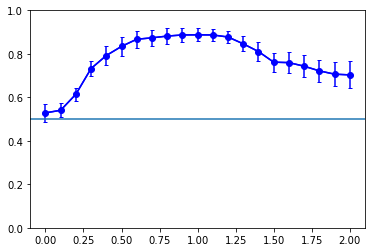

In [28]:
accuracies_list_mean = []
accuracies_list_mean_matrix = []
skip_counter=0
skip_trial_counter = 0
BR = 'MOs'

for session in tqdm(range(39)):
  x, y = apply_filters(session, BR)
  if x.shape[1] < 50:
    skip_counter += 1
    continue
  if x.shape[0] < 18:
    skip_trial_counter += 1
    continue

  #making meanrate with a moving time window
  def window(timebin, step, x):
      a = []
      for i in range(0, x.shape[2] + step - timebin, step):
          if (len(a)):
              a = np.append(a, np.mean(x[:,:,i:i+timebin], axis=2, keepdims=True), axis=2)
          else:
              a = np.mean(x[:,:,i:i+timebin], axis=2, keepdims=True)
      return a

  x_meanrate=window(50, 10, x)

  from sklearn.model_selection import train_test_split
  

  # assign the model (to a variable)
  #log_reg = LogisticRegression(penalty="l2", C=3, solver='liblinear', max_iter=5000)

    #find best C value 
  def model_selection(X_train, y_train, C_values):


    accuracies = []

    for C in C_values:
      # assign the model (to a variable)
      log_reg = LogisticRegression(penalty="l2", C=C, solver='liblinear', max_iter=5000)

      # Get the accuracy for each test split using cross-validation

      accs = cross_val_score(log_reg, X_train, y_train, cv=3)

      # Store the average test accuracy for this value of C
      accuracies.append(accs.mean())

    return accuracies


  accuracies_matrix = []
  
  for j in range(10):
    a=np.random.choice(x_meanrate.shape[1], size=50, replace=False)
    x_meanrate_50=x_meanrate[:,a]
    X_train, X_test, y_train, y_test = train_test_split(x_meanrate_50,y, test_size=0.33)
    # Fit it to data / maximum likelihood calculation
    accuracies_list = []

    for i in range(21):
      C_values = np.logspace(-4, 4, 9)
      C_max= np.max(C_values)
      C_min= np.min(C_values)
      accuracies = model_selection(X_train[:,:,i], y_train, C_values)
      best_C = C_values[np.argmax(accuracies)]
      #print('Best value for C is: {}'.format(best_C))

      log_reg = LogisticRegression(penalty="l2", C=best_C, solver='liblinear', max_iter=5000)
      log_reg.fit(X_train[:,:,i], y_train)

      # predicting Y (behavioral outcome)
      y_pred = log_reg.predict(X_test[:,:,i])

      accuracy = (y_test==y_pred).mean()
      accuracies_list.append(accuracy)

    accuracies_list = np.array(accuracies_list)
    #print(accuracies_list)
    accuracies_matrix.append(accuracies_list)
  accuracies_list_mean=np.mean(accuracies_matrix, axis=0)
  accuracies_list_mean_matrix.append(accuracies_list_mean)

time_axis= np.arange(0, 2.1, 0.1)
plt.plot(time_axis, np.mean(accuracies_list_mean_matrix, axis=0), 'bo-')
plt.errorbar(time_axis, np.mean(accuracies_list_mean_matrix, axis=0), yerr=np.std(accuracies_list_mean_matrix, axis=0)/2, capsize=2, color='blue')
plt.ylim(0,1)
plt.axhline(y=0.5)
print('The number of sessions for brain area {}: {}'.format(BR, session-skip_counter-skip_trial_counter+1))


In [21]:
LGd = accuracies_list_mean_matrix

In [23]:
LP = accuracies_list_mean_matrix

In [25]:
VISp = accuracies_list_mean_matrix

In [27]:
MOp = accuracies_list_mean_matrix

In [29]:
MOs = accuracies_list_mean_matrix

In [30]:
np.savetxt('LGd.csv', LGd, delimiter=',')
np.savetxt('LP.csv', LP, delimiter=',')
np.savetxt('VISp.csv', VISp, delimiter=',')
np.savetxt('MOp.csv', MOp, delimiter=',')
np.savetxt('MOs.csv', MOs, delimiter=',')

In [31]:
#check or create
import os 
data={}
for i in list(filter(lambda x: '.csv' in x, os.listdir())):
  data[i[:-4]]=np.loadtxt(i, delimiter=',')
 

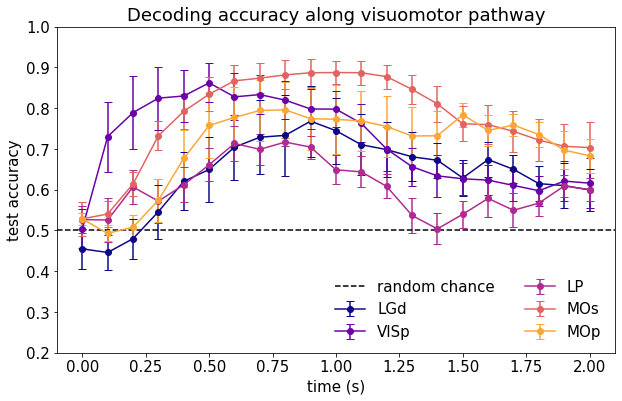

In [32]:
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})
plt.title('Decoding accuracy along visuomotor pathway')
plt.xlabel('time (s)')
plt.ylabel('test accuracy')

#plt.cm.plasma(0)

#plt.plot(time_axis, np.mean(data['LGd'], axis=0), 'o-') #loves decision
#plt.plot(time_axis, np.mean(data['LP'], axis=0), 'o-') #*
#plt.plot(time_axis, np.mean(data['VISp'], axis=0), 'o-') #p
#plt.plot(time_axis, np.mean(data['MOp'], axis=0), 'o-') #2
#plt.plot(time_axis, np.mean(data['MOs'], axis=0), 'o-') #^

plt.errorbar(time_axis, np.mean(data['LGd'], axis=0), yerr=np.std(data['LGd'], axis=0)/2, capsize=4, color=plt.cm.plasma(0), fmt='o-')
plt.errorbar(time_axis, np.mean(data['VISp'], axis=0), yerr=np.std(data['VISp'], axis=0)/2, capsize=4, color=plt.cm.plasma(0.2), fmt='o-')
plt.errorbar(time_axis, np.mean(data['LP'], axis=0), yerr=np.std(data['LP'], axis=0)/2, capsize=4, color=plt.cm.plasma(0.4), fmt='o-')
plt.errorbar(time_axis, np.mean(data['MOs'], axis=0), yerr=np.std(data['MOs'], axis=0)/2, capsize=4, color=plt.cm.plasma(0.6), fmt='o-')
plt.errorbar(time_axis, np.mean(data['MOp'], axis=0), yerr=np.std(data['MOp'], axis=0)/2, capsize=4, color=plt.cm.plasma(0.8), fmt='o-') 
 #change the colours so it matches to the region
plt.axhline(y=0.5, linestyle='dashed', color='black')
plt.ylim(0.2,1)

plt.legend(['random chance','LGd', 'VISp', 'LP', 'MOs', 'MOp'],  loc='lower right', frameon=False, ncol=2)
#plt.show()


([<matplotlib.axis.XTick at 0x1049fcbd670>,
 [Text(0, 0, 'LGN'),
  Text(0, 0, 'VISp'),
  Text(0, 0, 'LP'),
  Text(0, 0, 'MOs'),
  Text(0, 0, 'MOp')])

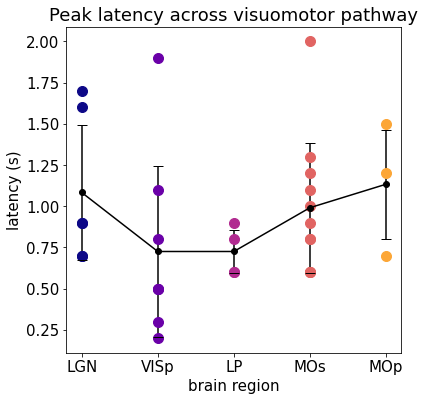

In [33]:
lgdl=np.argmax(data['LGd'], axis=1)
vispl=np.argmax(data['VISp'], axis=1)
lpl=np.argmax(data['LP'], axis=1)
mosl=np.argmax(data['MOs'], axis=1)
mopl=np.argmax(data['MOp'], axis=1)

plt.figure(figsize=(6, 6))
plt.title('Peak latency across visuomotor pathway')
plt.xlabel('brain region')
plt.ylabel('latency (s)')

plt.plot(np.zeros_like(lgdl), time_axis[lgdl], 'o', color=plt.cm.plasma(0), markersize=10)
plt.plot(np.ones_like(vispl), time_axis[vispl], 'o', color=plt.cm.plasma(0.2), markersize=10)
plt.plot(np.ones_like(lpl)*2, time_axis[lpl], 'o', color=plt.cm.plasma(0.4), markersize=10)
plt.plot(np.ones_like(mosl)*3, time_axis[mosl], 'o', color=plt.cm.plasma(0.6), markersize=10)
plt.plot(np.ones_like(mopl)*4, time_axis[mopl], 'o', color=plt.cm.plasma(0.8), markersize=10)
plt.errorbar([0, 1, 2, 3, 4], [np.mean(time_axis[lgdl]), np.mean(time_axis[vispl]), np.mean(time_axis[lpl]), np.mean(time_axis[mosl]), np.mean(time_axis[mopl])], 
             yerr=[np.std(time_axis[lgdl]), np.std(time_axis[vispl]), np.std(time_axis[lpl]), np.std(time_axis[mosl]), np.std(time_axis[mopl])], fmt='o-', capsize=5, color='black')
plt.xticks([0, 1, 2, 3, 4], ['LGN', 'VISp','LP', 'MOs', 'MOp'])

In [18]:
list_brain_areas = ['CP','GPe','MOp','MOs','LD','LGd','LP','MD','PO','POL','ORB','SCm','VISa','VISam','VISl','VISp','VISpm','VISrl','VPL','VPM']

In [19]:
def brainarea_filter(i, BR):
    #mask for the brain region
    dat = alldat[i]
    ba = dat['brain_area']
    m_brainregion=np.zeros(len(ba), dtype=np.bool)
    for i in range(len(dat['brain_area'])):
        if ba[i] == BR:
            m_brainregion[i]=True
        else:
            m_brainregion[i]=False
    return m_brainregion
    
minimums=[]
b=0

for j in list_brain_areas:
  for i in range(39):
    dat = alldat[i]
    spikes=dat['spks']
    mba=brainarea_filter(i, j)
    sm=spikes[mba]
    if sm.shape[0]==0:
      continue
    a=(sm.shape[0])      
    if (a < b) or (b == 0):
      b=a
  minimums.append(b)
  b=0

brain_areas_minimums=[]
for i in range(len(list_brain_areas)):
  brain_areas_minimums.append([list_brain_areas[i], minimums[i]])
print(brain_areas_minimums)



[['CP', 59], ['GPe', 63], ['MOp', 166], ['MOs', 6], ['LD', 12], ['LGd', 8], ['LP', 4], ['MD', 116], ['PO', 45], ['POL', 22], ['ORB', 32], ['SCm', 23], ['VISa', 19], ['VISam', 34], ['VISl', 99], ['VISp', 15], ['VISpm', 68], ['VISrl', 136], ['VPL', 50], ['VPM', 31]]
